## Exercise 1: Diamonds are a Data Analyst's Best Friend

Consider the `diamonds` data set available with Seaborn.

<https://coatless.github.io/raw-data/diamonds.csv>

The data set provides an overview of how diamonds are priced. More specifically, each diamond has the following qualities:

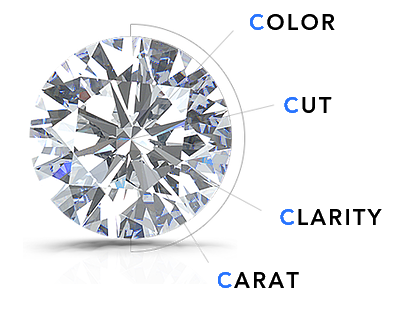

Codebook containing information on variables included:

- `price`: in US dollars: \$326 to \$18,823
- `carat`: weight of the diamond: 0.2 to 5.01
- `cut`: quality of the cut: Fair, Good, Very Good, Premium, Ideal
- `color`: diamond colour: J (worst) to D (best)
- `clarity`: a measurement of how clear the diamond is: I1 (worst), SI2, SI1, VS2, - VS1, VVS2, VVS1, IF (best)
- `depth` - total depth percentage = z / mean(x, y) = 2 * z / (x + y) *table - width of top of diamond relative to widest point: 43 to 95
- `x`: length in mm: 0 to 10.74
- `y`: width in mm: 0 to 58.9
- `z`: depth in mm:0 to 31.8

### a

Read in the `diamonds` data into _Python_ using Pandas, view the head and taili of the data set, and obtain numerical summaries for the data to confirm the values given in the above codebook.

In [2]:
# code here

import pandas as pd

url = "https://coatless.github.io/raw-data/diamonds.csv"
diamonds = pd.read_csv(url)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### b

Construct a scatterplot that compares the `carat` vs. `price`

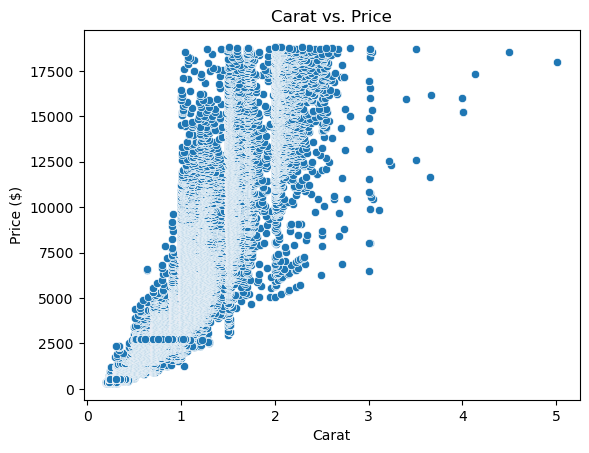

In [9]:
# code here

import seaborn as sns
import matplotlib.pyplot as plt

# Construct scatterplot by groups
sns.scatterplot(
    data = diamonds,
    x = "carat",
    y = "price"
)

# Modify seaborn graph by using matplotlib functions
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price ($)');

Are there any noticable trends in the data?

...

**Yes! The relationship between diamond weght and price is positive as expected. That is, the heavier the pricier, with most most diamonds having carat between 0 and 3.**

...

### c

Revisiting the `carat` vs. `price` comparison, construct a scatter plot that displays the color and trend line of price by `clarity`.

Text(44.359093749999985, 0.5, 'Price ($)')

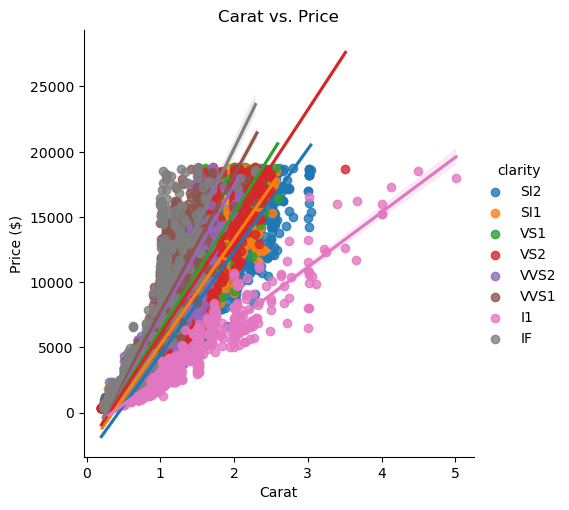

In [13]:
# code here

sns.lmplot(
    data = diamonds,
    x = "carat",
    y = "price", 
    hue = "clarity"
)

plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price ($)')

With the addition of `clarity`, how does there any noticable trends in the data?

... **Yes. Clarity wise, the relationship both variables remain positive with the '1l' having the steadiest (or slowest) positive linear growth and diamonds in the higher carat range unlike other clarity types.** ...

### d

Construct a Facet Grid of scatterplots that graph the relationship of `carat` vs. `price` split by `clarity`. Highlight different groups by applying a hue to `cut`.


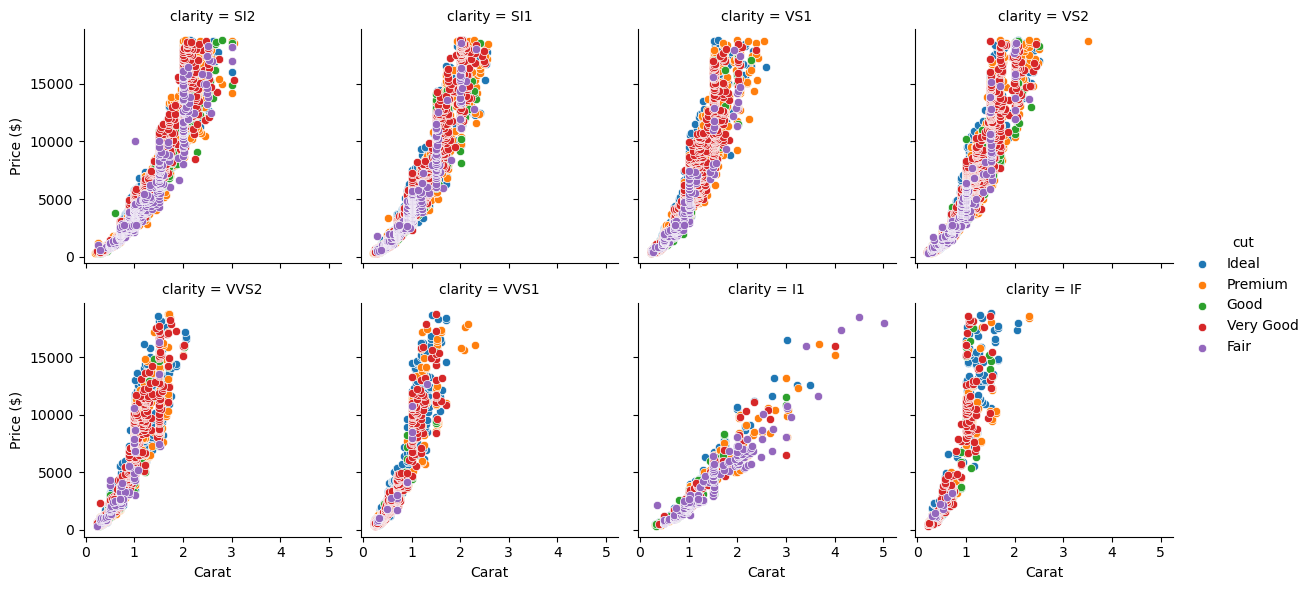

In [15]:
# code here
g = sns.FacetGrid(diamonds, col="clarity", hue="cut", col_wrap=4)
g.map_dataframe(sns.scatterplot, "carat", "price");
g.set_axis_labels("Carat", "Price ($)")
g.add_legend();

### e

Instead of partitioning just on `clarity`, revisit the prior facet grid and change the partition to be by the levels of `color` and `clarity`.

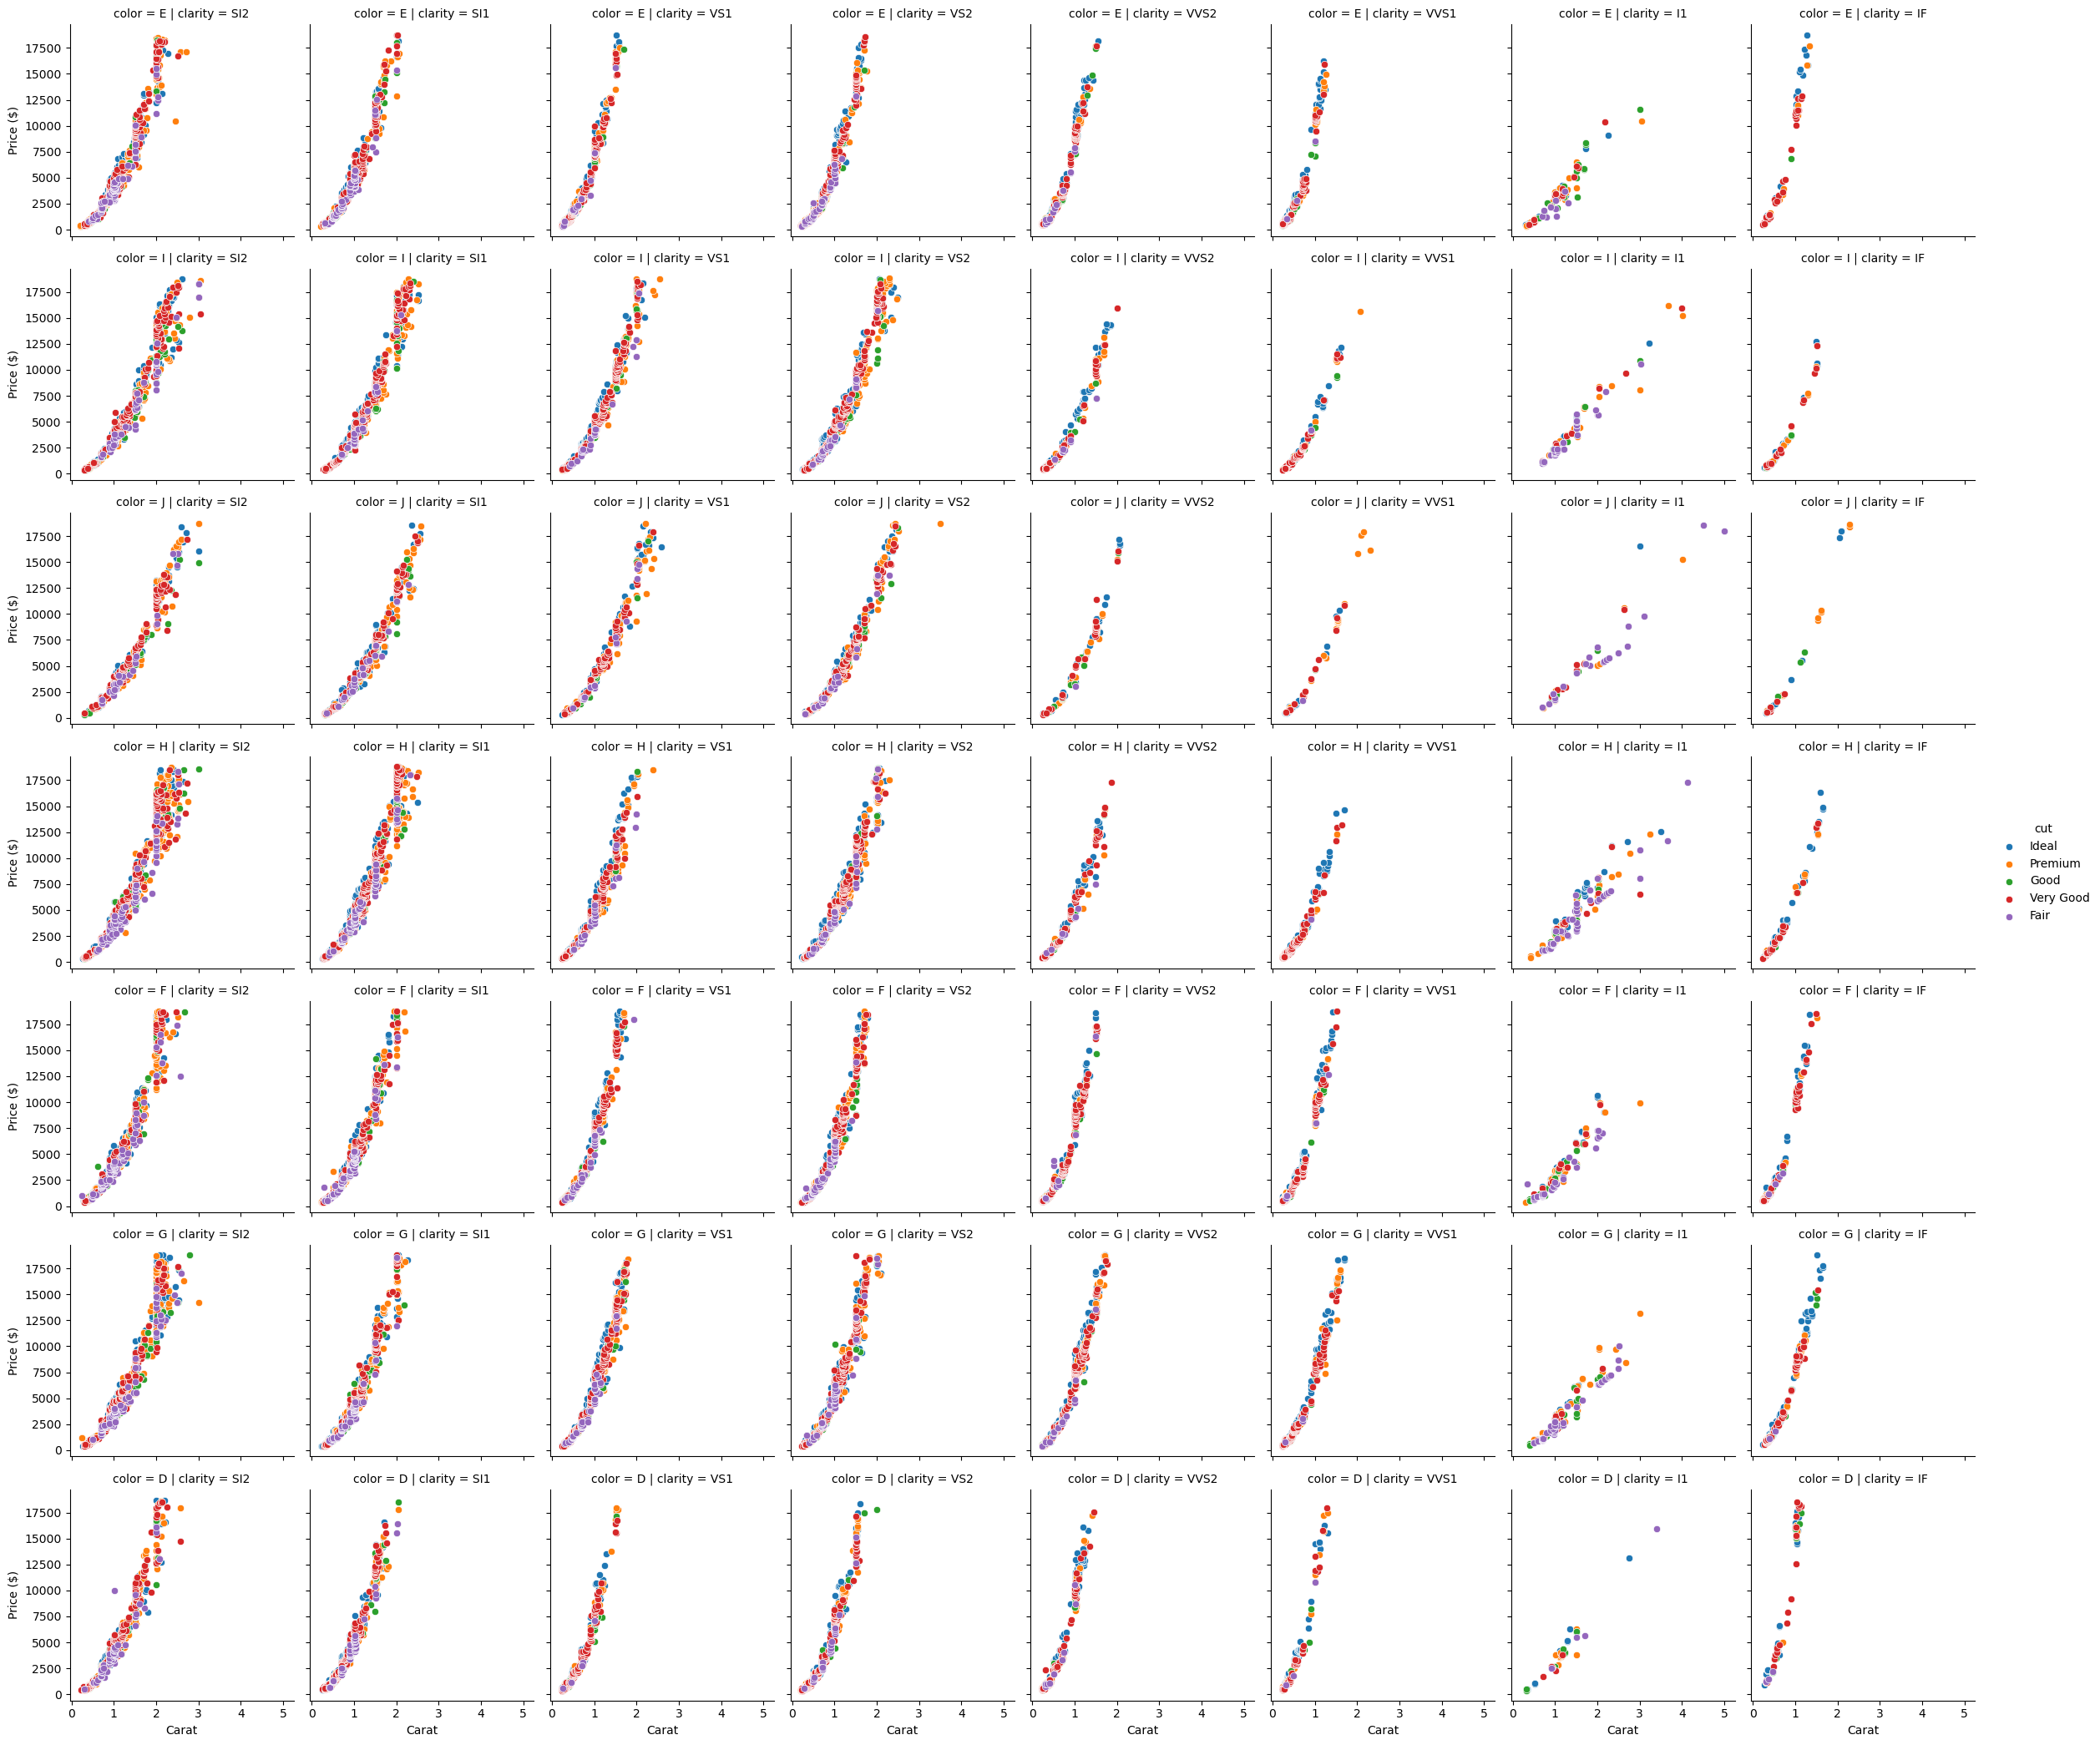

In [17]:
# code here
g = sns.FacetGrid(diamonds, row="color", col="clarity", hue="cut")
g.map_dataframe(sns.scatterplot, "carat", "price");
g.set_axis_labels("Carat", "Price ($)")
g.add_legend();

### f

Working within your group, please create a new graph that highlights any part of the `diamonds` data that fascinates the group.

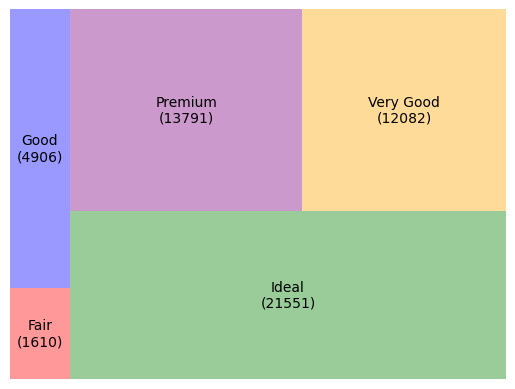

In [19]:
# code here
import squarify # pip install squarify (algorithm for treemap)
# Obtain counts of the data
data = diamonds.groupby("cut").size()

# Retrieve grouped labels
labels = data.index + "\n(" + data.values.astype("str") + ")"

# Change color
squarify.plot(sizes=data, label=labels, color = ["red", "blue", "green", "purple", "orange"], alpha=.4 )
plt.axis('off')
plt.show()

## Exercise 2: Seeing Tastiness

For each graph, please make sure to include plot title, axis labels and legends.

### a

Recall the cleaned version of the [Ramen Ratings dataset](https://www.kaggle.com/datasets/residentmario/ramen-ratings). Inside the data set, we have 5 variables:

- `'Brand'`: the brand of the ramen product.
- `'Variety'`: the product’s name on its label.
- `'Style'`: packaging style (cup, bowl, tray, etc.)
- `'Country'`: country or dependent territory the product was produced in.
- `'Stars'`: the rating of the product on a 5-point scale.

This dataset is available at:

<https://coatless.github.io/raw-data/ramen-ratings-cleaned.csv>

Please read in the ramen ratings data set.


In [23]:
# code here
url2 = "https://coatless.github.io/raw-data/ramen-ratings-cleaned.csv"

ramen = pd.read_csv(url2)

ramen.head()

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


### b

- Plot a boxplot of the star ratings for each packaging style of Nissin ramen produced in the US.


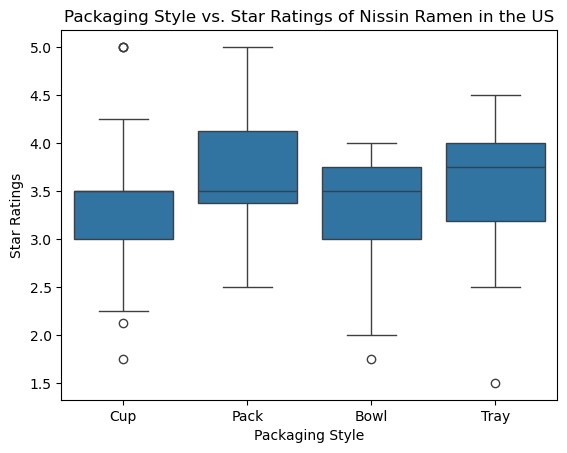

In [56]:
# code here
only_USA = ramen['Country'] == 'USA'
only_UnitedStates = ramen['Country'] == 'United States'
only_Nissin = ramen["Brand"] == "Nissin"

ramenNissin_US = ramen[only_Nissin & (only_USA | only_UnitedStates)]

sns.boxplot(
    data = ramenNissin_US,
    x = "Style",
    y = "Stars"
)

plt.title('Packaging Style vs. Star Ratings of Nissin Ramen in the US')
plt.xlabel('Packaging Style')
plt.ylabel('Star Ratings');

### c

Plot a bar chart of the **average star ratings** for ramen products produced in the following countries: United States ('USA' or 'United States'), South Korea, Japan, and Vietnam.

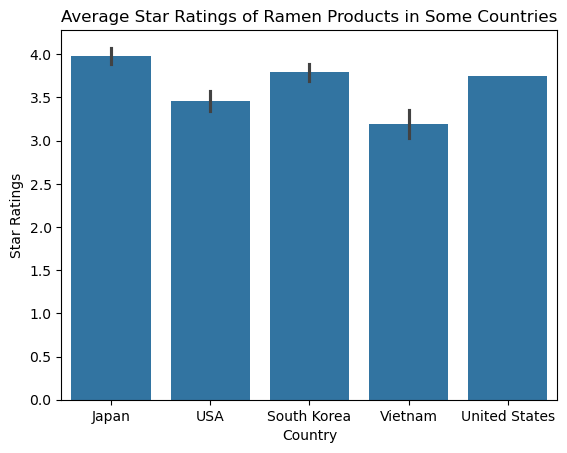

In [55]:
# code here
some_countries = ramen['Country'].isin(['USA', 'United States', 'South Korea', 'Japan', 'Vietnam'])

ramenCustom = ramen[some_countries]

sns.barplot(
    data = ramenCustom,
    x = "Country",
    y = "Stars"
)

plt.title('Average Star Ratings of Ramen Products in Some Countries')
plt.xlabel('Country')
plt.ylabel('Star Ratings');

### d

Plot a **horizontal stacked (side-by-side)** bar chart of the number of 'Cup', 'Pack' and 'Bowl' for ramen products produced in the following countries: United States ('USA' or 'United States'), South Korea, Japan, and Vietnam.

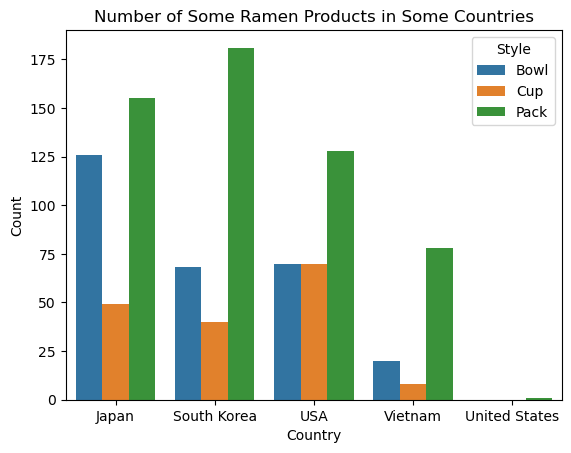

In [54]:
# code here
some_countries = ramen['Country'].isin(['USA', 'United States', 'South Korea', 'Japan', 'Vietnam'])
some_styles = ramen['Style'].isin(['Cup', 'Pack', 'Bowl'])

ramenCustom = ramen[some_countries & some_styles]

ramenCustom = (
    ramenCustom.groupby(['Style', 'Country'])
    .size()
    .reset_index(name='Count')
)

ramenCustom.head()

sns.barplot(data = ramenCustom,
    x = "Country",
    y = "Count",
    hue = "Style"
)

plt.title('Number of Some Ramen Products in Some Countries')
plt.xlabel('Country')
plt.ylabel('Count');

## Exercise 3: Beat of a Heart

For each graph, please make sure to include plot title, axis labels and legends.

### a

Read in the processed Cleveland dataset from the UCI Machine Learning Repository available at:

<https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data>

For the data dictionary, please see:

<https://archive.ics.uci.edu/ml/datasets/heart+disease>

In [11]:
# code here

### b

- Create boxplots of resting blood pressure for patients with heart disease (`num` is coded as 1, 2, 3, or 4) and without heart disease (`num` is coded as 0).

In [12]:
# code here

### c

Plot an empirical cdf plot (`ecdf`) of the resting blood pressure for patients with heart disease (`num` is coded as 1, 2, 3, or 4) and without heart disease (`num` is coded as 0). Color each heart disease line differently.

In [13]:
# code here

## Exercise 4: To Tip or Not to Tip

For each graph, please make sure to include plot title, axis labels and legends.


### a

Read in the `tips.csv` dataset from:

<https://coatless.github.io/raw-data/tips.csv>

The data set was created under:

> One waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips.

The data was obtained from:

> Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

The data dictionary associated with the data is as follows:

- `total_bill`:	Bill in dollars
- `tip`: Tip in dollars
-	`sex`: Sex of the bill payer (Female, Male)
-	`smoker`: Whether there were smokers in the party. (true, false)
- `day`: Day of the week (Sat, Sun, Mon, Tue, Wed, Thu, Fri)
- `time`: Service session (Lunch, Dinner)
-	`size`: Amount of people in the party

### b

Plot a side-by-side bar chart of the **average percent** of tip (with respect to the total bill) for each day of the week, color the bar by the time of the meal (Dinner vs. Lunch).

In [14]:
# code here

### c

Plot a scatterplot of total bill amount vs. the tip amount, color the points depending on whether the guests were smokers.


In [15]:
# code here

### d

Plot a scatterplot of total bill amount vs. the tip amount, color the points depending on whether the meal was lunch or dinner, and adjust the size of the points depending on the number of customers in each party.

Make sure to include plot title, axis labels, and legend. **Adjust the visibility of the points so overlapped points can still be viewed.**

In [16]:
# code here

### e

Plot a histogram of the total bill amount.

In [17]:
# code here

### f

Plot a (horizontal) facet grid of histogram of **total bill per person** (meaning total bill divided by the number in each party) for smoker and non-smoker customers.

In [18]:
# code here